In [30]:
import re
import os
import json
import numpy as np
from collections import OrderedDict
from matplotlib import pyplot as plt

In [66]:
log_dir = "../benchmark_test/"
env = "Pendulum-v1"
algorithm = "td3"
num_seeds = r"(\d*)"
global_seed = r"(\d*)"

In [67]:
expr = f"{env}_{algorithm}_{num_seeds}_{global_seed}.json"
files = [f for f in os.listdir(log_dir) if re.fullmatch(expr, f)]
logs = []

for f in files:
    with open(os.path.join(log_dir, f), "r") as f:
        logs.append(json.load(f))

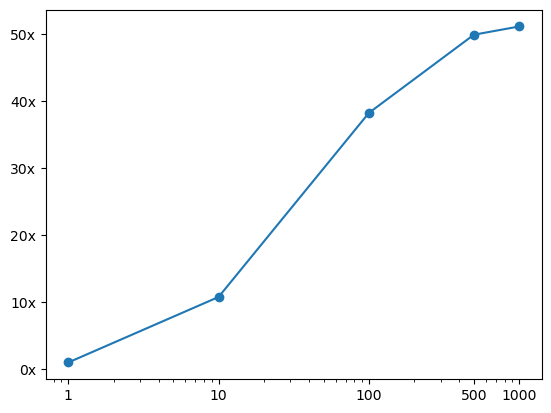

In [68]:
# Plot speedup per seed
sps = {}
for log in logs:
    num_seeds = log["num_seeds"]
    process_time = log["time/process_time"][-1]
    sps[num_seeds] = process_time / num_seeds
sps = OrderedDict(sorted(sps.items(), key=lambda x: x[0]))

relative_sps = np.array(list(sps.values()))
speedup = relative_sps[0] / relative_sps

plt.plot(sps.keys(), speedup, marker="o")
yticks, _ = plt.yticks()
ylim = plt.ylim()
plt.gca().set(
    xscale="log", 
    xticks=list(sps.keys()), 
    xticklabels=list(sps.keys()),
    yticks=yticks,
    yticklabels=[f"{x:g}x" for x in yticks],
    ylim=ylim,
)
plt.show()